<a href="https://colab.research.google.com/github/bhanu0925/ML_RoadTrafficAcident_Severity_Classification/blob/main/Road_Traffic_Accident_Severity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Traffic Accident Severity Classification

This data set is collected from Addis Ababa Sub city police departments for Masters research work. The data set has been prepared from manual records of road traffic accident of the year 2017-20.

In [1]:
import os
ROOT = "/content/drive/MyDrive/ML/"
os.chdir(ROOT)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

## Load the data

In [3]:
pd.set_option('display.max_columns', None)
RTA_Data = pd.read_csv('RTA_Dataset.csv')
RTA_Data.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y Shape,NaN,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,Crossing,NaN,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,No defect,Residential areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Earth roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


## EDA

In [4]:
RTA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### 1. Missing Values

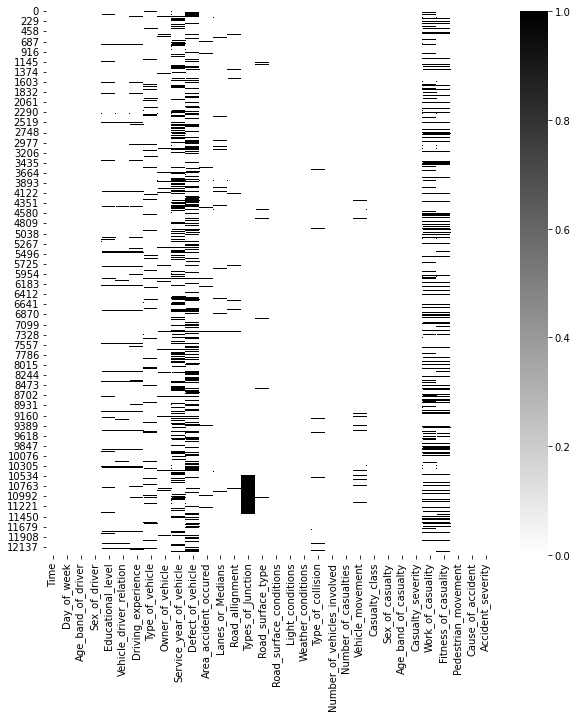

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(RTA_Data.isnull(),cmap='binary')

### Missing Values in percentages

In [6]:
cols = []
per = []
miss_val_col = []

for col in RTA_Data.columns:
    cols.append(col)
    pert = (RTA_Data[col].isnull().sum()/RTA_Data.shape[0])*100
    per.append(pert)
    if RTA_Data[col].isnull().sum() > 0:
        miss_val_col.append(col)        
df_null_pert = pd.DataFrame({"columns" : cols, "Percentage" : per})
df_null_pert

,columns,Percentage
0,Time,0.000000
1,Day_of_week,0.000000
2,Age_band_of_driver,0.000000
3,Sex_of_driver,0.000000
4,Educational_level,6.016564
5,Vehicle_driver_relation,4.701202
6,Driving_experience,6.731082
7,Type_of_vehicle,7.713543
8,Owner_of_vehicle,3.913608
9,Service_year_of_vehicle,31.893472


In [7]:
miss_val_col

['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality']

## Columns with Missing values more than 20%

In [8]:
mask = df_null_pert['Percentage'] >= 20
df_null_pert[mask]

,columns,Percentage
9,Service_year_of_vehicle,31.893472
10,Defect_of_vehicle,35.945112
27,Work_of_casuality,25.966223
28,Fitness_of_casuality,21.394933


### 2. Categorical Columns and its unique values

In [9]:
RTA_Data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


### Few points to note from the above summary

1. Number of vehicles involved in an accident is average of 2
2. Number of people injured in an accident is 1 to 2
3. Maximum vehicals involed in an accident is 7
4. Maximum people injured in a accident is 8

In [10]:
RTA_Data.describe(include=['O']).T  ## or RTA_Data.describe(include='object')

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


### Few points to note from the above summary

1. Most of the accidents took place on Friday
2. Most of the accidents happend in the (mid of the dat) afternoon, in day time
3. The age band of the driver 18-30
4. Most drivers were Male
5. Most of the drivers had driving experience of 5-10 yers
6. Vehicles involded in the accidents where autimobiles
7. Most them owned the vehicles
8. Most Accidents took place while going straight
9. Most of the casualities are Male
10. The more casualities were also drivers
11. Casualities were not a pedestrains
12. Cause of accident is not maintaining distance
13. Most of the accident severity were slightly injured. - > this shows imbalance in data
14. Most accident took place in two way roads
15. Road alligment - Tangent road with flat terrain	
16. Type of junction - Y Shape
17. Roadsurface type - Asphalt roads
18. Road surface condition - dry
19. Lighting condition Daylight - (This is same as time feature , most accident happend during day time)
20. weather condition - normal

### No Duplicate rows

In [11]:
RTA_Data[RTA_Data.duplicated()]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


# **3. Data Visualization**

### Univeriate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f313331ad90>,
      dtype=object)

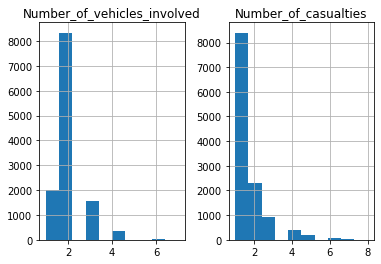

In [12]:
RTA_Data.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


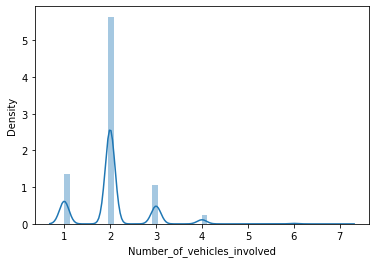

In [13]:
sns.distplot(RTA_Data['Number_of_vehicles_involved'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


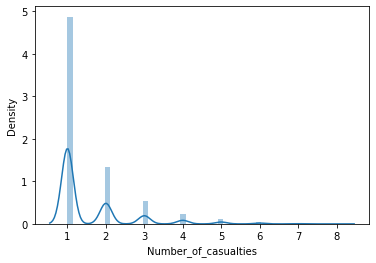

In [14]:
sns.distplot(RTA_Data['Number_of_casualties'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


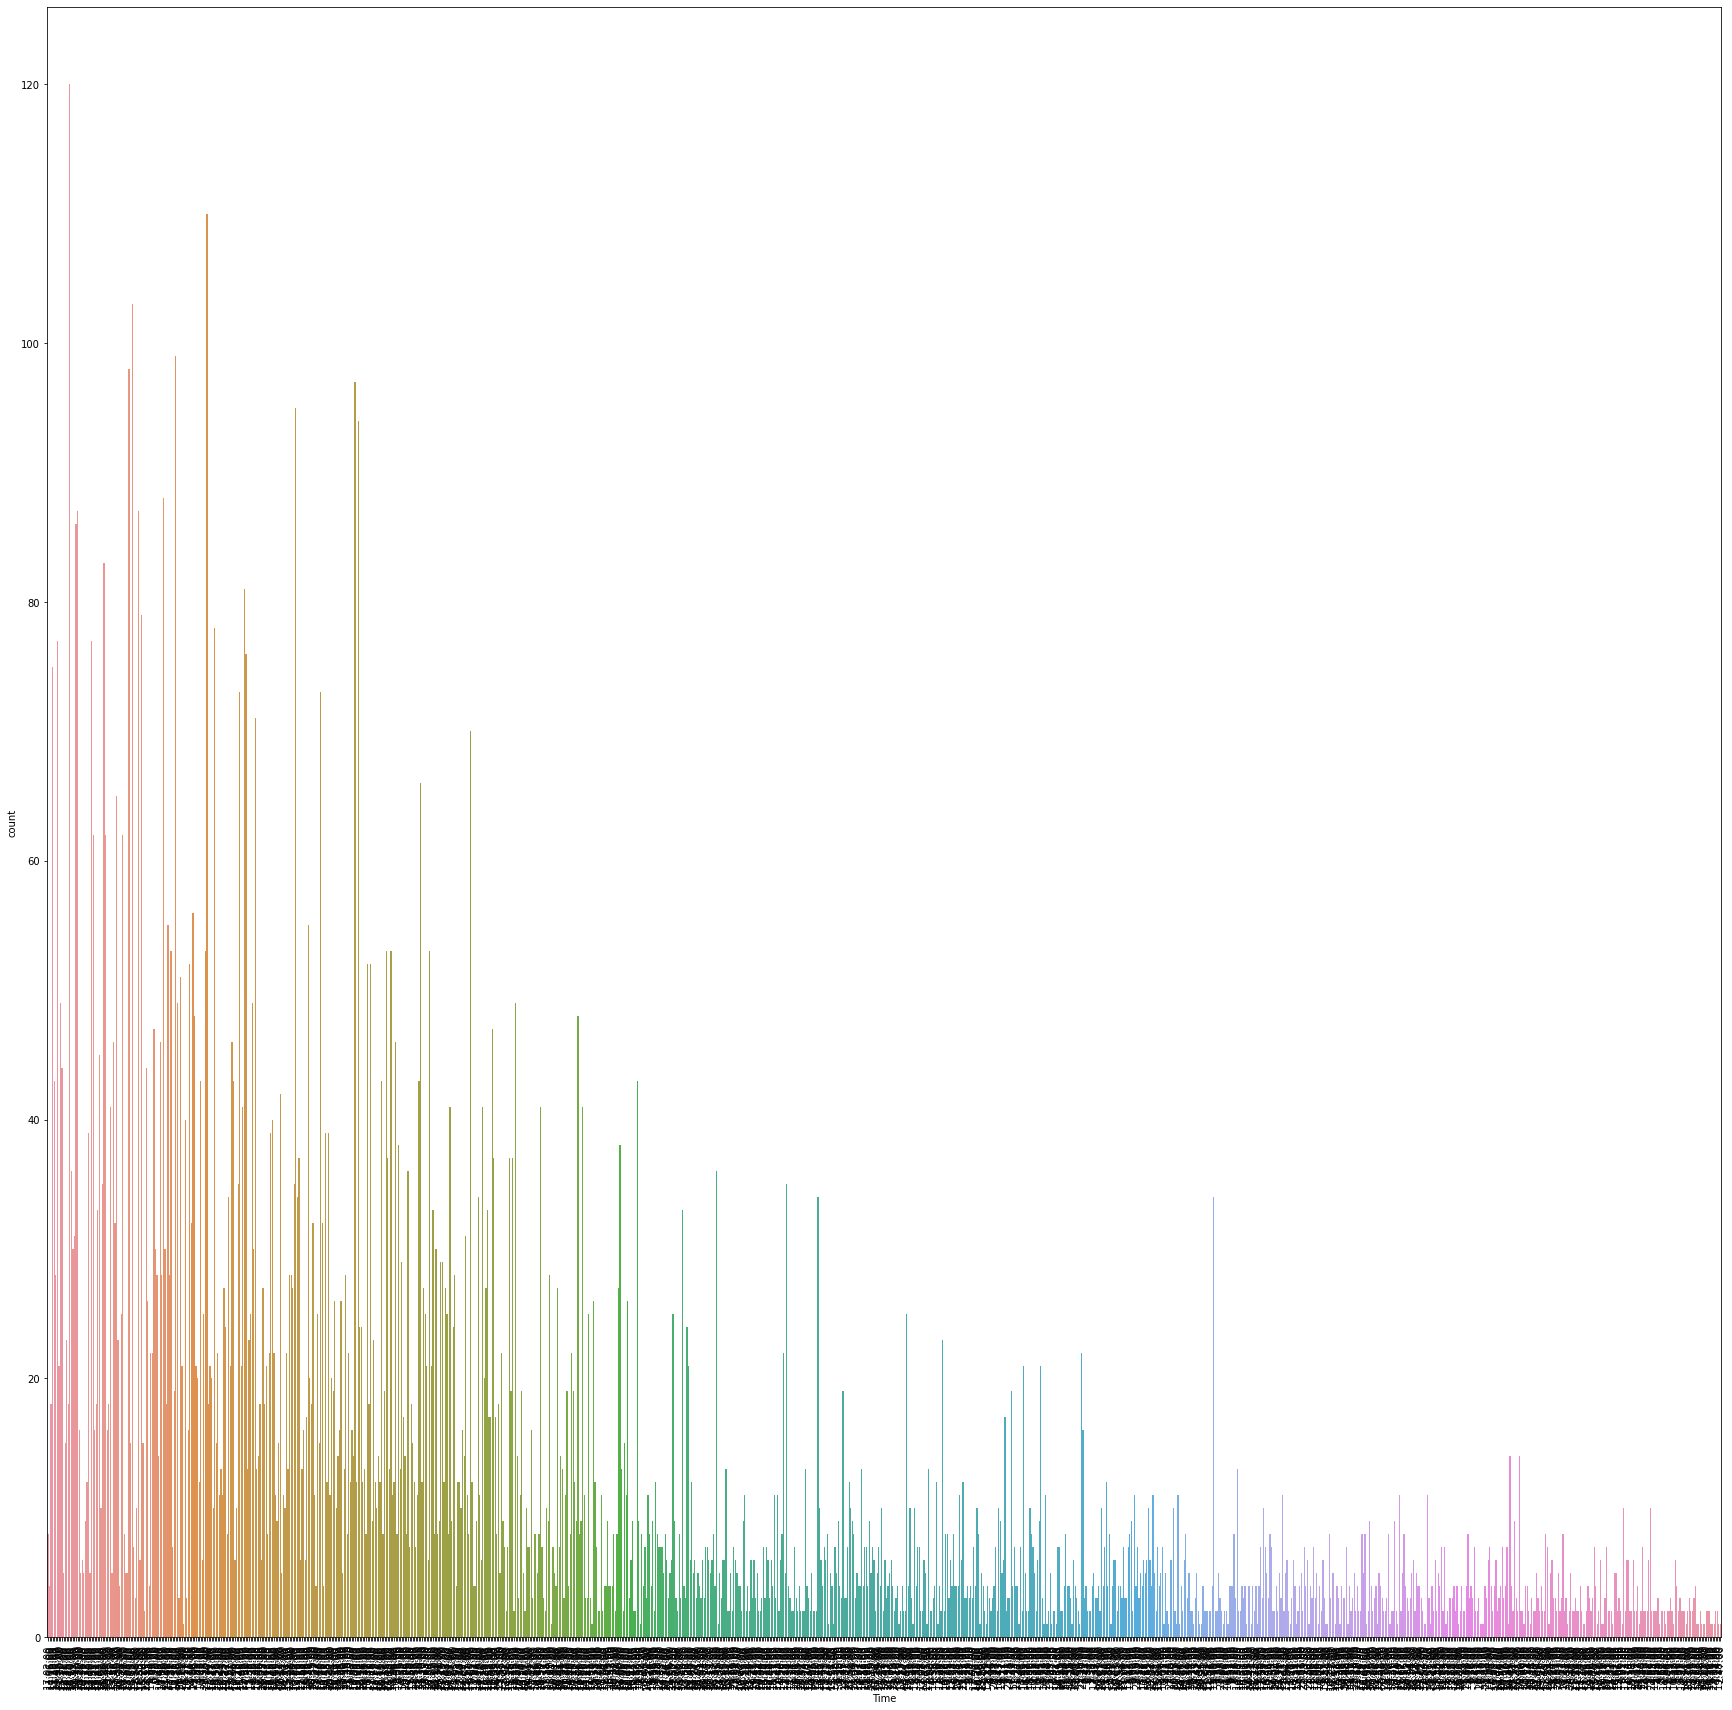

In [15]:
plt.figure(figsize=(30,30))
sns.countplot(RTA_Data['Time'])
plt.xticks(rotation=90);

In [16]:
def fetchtime(x):
    return(int(x.split(':')[0]))

RTA_Data['Time'] = RTA_Data['Time'].apply(fetchtime)
RTA_Data


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [17]:
def categorizetime(x):
    if x >=6 and x < 18 :
        return('Day')
    elif x < 6 or x >= 18:
        return('Night')
RTA_Data['Time'] = RTA_Data['Time'].apply(categorizetime)
RTA_Data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Day,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Night,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Day,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Day,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [18]:
RTA_Data['Time'].unique()

array(['Day', 'Night'], dtype=object)

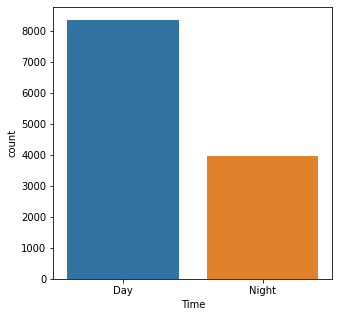

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x=RTA_Data['Time'])

In [20]:
def catDistribution(col_name):
    print(f"null Value : {RTA_Data[col_name].isnull().sum()}")
    print(f"Unique values - {RTA_Data[col_name].unique()}")
    sns.countplot(x=RTA_Data[col_name])
    plt.xticks(rotation=90);
    plt.show()

null Value : 0
Unique values - ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']


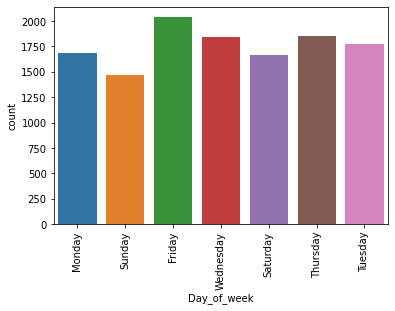

In [21]:
catDistribution('Day_of_week')

In [22]:
cat_col = RTA_Data.select_dtypes(include='object').columns
cat_col

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


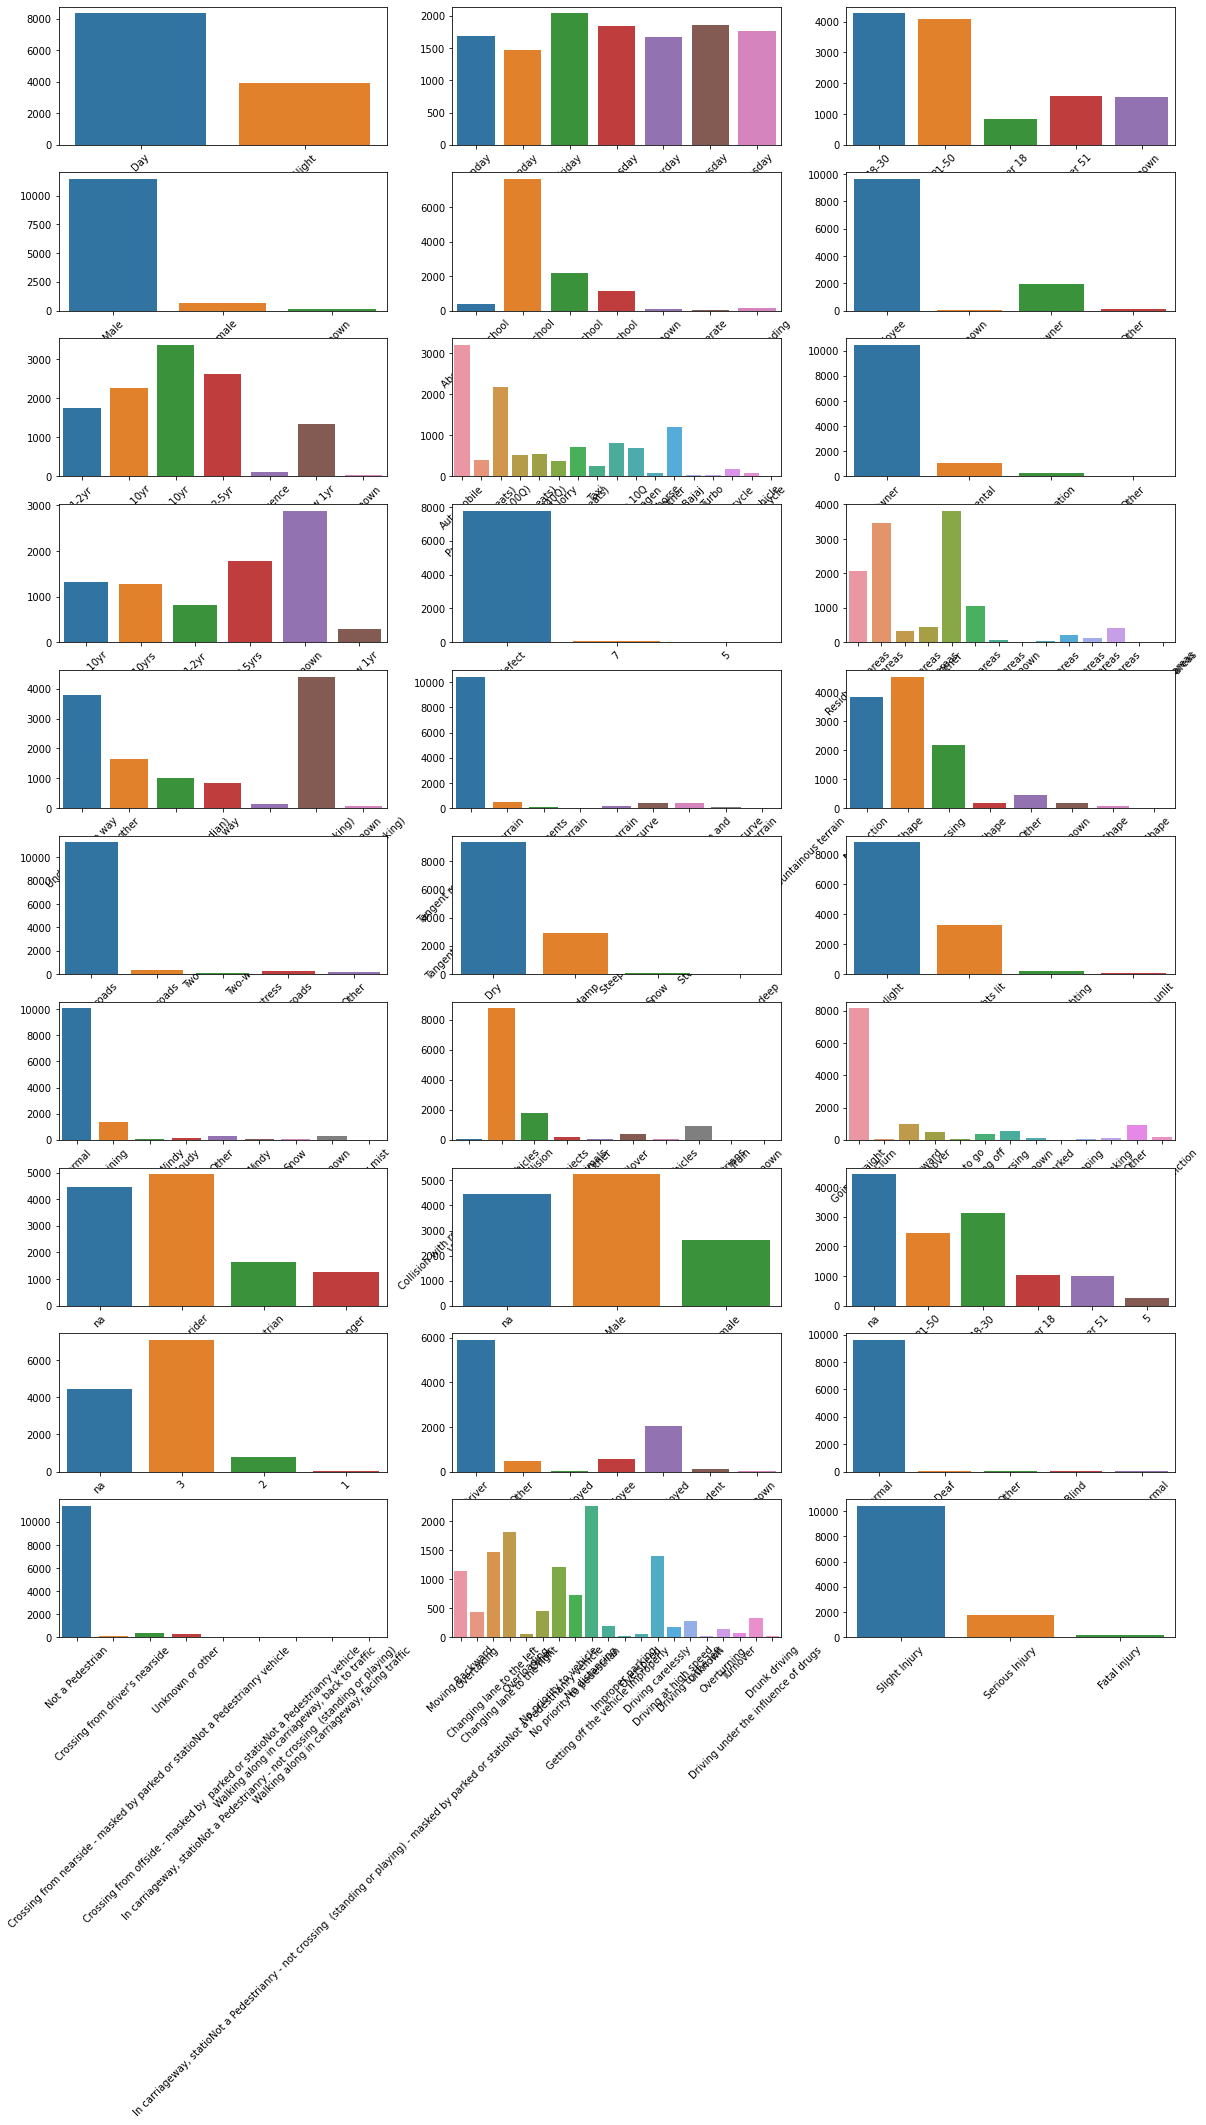

In [23]:
plt.figure(figsize = (20, 30))
for i in enumerate(cat_col):
    plt.subplot(10, 3,i[0]+1,)
    sns.countplot(x=i[1],data = RTA_Data)
    plt.xticks(rotation = 45)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout() 

### Target columns

null Value : 0
Unique values - ['Slight Injury' 'Serious Injury' 'Fatal injury']


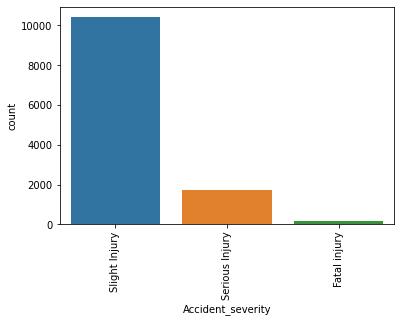

In [24]:
catDistribution('Accident_severity')

## 2. Data Preprocessing

In [25]:
RTA_Data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [26]:
def catFillMissingValueWithMode(df, col):
    df[col].fillna(value=df[col].mode()[0],inplace=True)
    return df

In [27]:
for col in RTA_Data.columns:
    if RTA_Data[col].dtype == 'object':
        RTA_Data = catFillMissingValueWithMode(RTA_Data,col)

In [28]:
RTA_Data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [29]:
RTA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

### Lable encoding categorical columns

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
RTA_Data = RTA_Data.apply(le.fit_transform)

In [31]:
RTA_Data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,1,0,0,0,0,3,3,2,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,0,2,5,9,2
1,0,1,1,1,4,0,3,11,3,2,2,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,0,2,5,16,2
2,0,1,0,1,4,0,0,5,3,5,2,1,6,5,1,0,0,3,2,2,1,1,2,0,1,1,2,0,2,5,0,1
3,1,3,0,1,4,0,2,11,0,5,2,6,6,6,7,2,0,0,2,8,1,1,2,2,0,0,2,0,2,5,1,2
4,1,3,0,1,4,0,1,0,3,2,2,4,6,5,7,0,0,0,2,8,1,1,2,3,2,5,3,0,2,5,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,0,6,1,1,4,0,1,4,3,5,2,5,4,5,1,0,0,3,2,8,1,0,2,3,2,5,3,0,2,5,10,2
12312,1,3,4,1,1,0,2,0,3,5,2,5,2,0,1,0,0,3,2,8,1,0,4,3,2,5,3,0,2,5,10,2
12313,0,3,2,1,4,0,2,1,3,1,2,5,2,7,1,0,0,3,2,8,0,0,4,0,1,1,2,0,2,5,1,1
12314,0,3,0,0,4,0,3,5,3,1,2,6,4,7,1,0,0,0,2,8,1,0,4,3,2,5,3,0,2,5,5,2


In [32]:
RTA_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,12316.0,0.321127,0.466928,0.0,0.0,0.0,1.0,1.0
Day_of_week,12316.0,2.980513,2.059712,0.0,1.0,3.0,5.0,6.0
Age_band_of_driver,12316.0,1.292952,1.337520,0.0,0.0,1.0,2.0,4.0
Sex_of_driver,12316.0,0.957535,0.263767,0.0,1.0,1.0,1.0,2.0
Educational_level,12316.0,3.208347,1.361538,0.0,2.0,4.0,4.0,6.0
Vehicle_driver_relation,12316.0,0.333793,0.741375,0.0,0.0,0.0,0.0,3.0
Driving_experience,12316.0,1.943732,1.236146,0.0,1.0,2.0,3.0,6.0
Type_of_vehicle,12316.0,5.100357,4.548810,0.0,0.0,5.0,8.0,16.0
Owner_of_vehicle,12316.0,2.693975,0.877637,0.0,3.0,3.0,3.0,3.0
Service_year_of_vehicle,12316.0,3.532559,1.800526,0.0,2.0,5.0,5.0,5.0


In [33]:
RTA_Data.corr()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
Time,1.000000,-0.047445,0.003039,-0.041570,-0.000640,0.010754,0.005141,-0.010396,-0.004096,-0.003117,0.001995,0.003584,-0.013307,-0.004914,-0.058842,0.004847,0.023678,-0.551455,0.025197,-0.004362,-0.018533,0.080820,-0.015331,0.001774,0.006459,0.011644,0.000154,0.006267,-0.010502,0.005713,-0.008214,-0.056872
Day_of_week,-0.047445,1.000000,0.019993,0.009986,-0.004517,0.003303,-0.010062,-0.002417,0.001417,-0.022951,-0.005889,0.003281,-0.009320,-0.008505,-0.026669,0.009832,-0.008294,0.036280,-0.003248,0.003026,-0.005621,-0.050042,-0.027643,0.006661,0.001461,-0.003642,0.001512,-0.006368,0.004884,0.000250,0.010516,-0.002730
Age_band_of_driver,0.003039,0.019993,1.000000,-0.351878,0.013613,-0.005841,-0.013407,0.004830,0.005405,0.000220,-0.018992,0.011472,0.008176,0.000486,-0.028025,0.001058,-0.032533,-0.007766,0.025482,0.000496,0.001690,-0.054474,-0.006562,0.005386,0.011358,0.000043,0.003565,-0.002739,-0.005154,0.000372,-0.000703,0.013185
Sex_of_driver,-0.041570,0.009986,-0.351878,1.000000,0.004967,0.011035,0.009855,-0.003757,-0.009489,0.010349,0.020155,-0.000274,-0.012529,-0.002238,0.004920,0.003112,0.031601,0.037390,-0.006179,-0.011513,-0.038643,0.048503,0.007058,0.003335,-0.006046,0.014191,0.002474,0.005684,0.005187,0.006981,-0.000598,0.004977
Educational_level,-0.000640,-0.004517,0.013613,0.004967,1.000000,-0.076866,0.057625,0.005447,-0.012486,-0.003894,-0.000522,-0.006854,-0.002756,-0.010213,0.014798,0.014345,0.008614,-0.000290,-0.000242,-0.009477,0.012401,0.003698,0.004248,0.005382,0.007483,0.008226,0.004950,0.017891,0.002357,0.000177,-0.000451,-0.001471
Vehicle_driver_relation,0.010754,0.003303,-0.005841,0.011035,-0.076866,1.000000,0.016686,-0.003481,0.014860,0.005514,-0.020240,0.021997,0.004656,-0.013660,-0.011548,-0.001312,0.004257,0.001351,-0.015357,-0.005568,0.008223,0.018222,0.005631,-0.002817,-0.000664,0.008115,-0.003230,-0.014366,0.026802,0.015803,-0.010753,-0.011253
Driving_experience,0.005141,-0.010062,-0.013407,0.009855,0.057625,0.016686,1.000000,0.014333,0.000144,-0.005653,-0.001149,-0.000290,-0.010444,-0.015602,0.009245,0.020872,-0.003696,-0.015577,-0.000084,0.012574,-0.008222,-0.007118,0.004794,-0.002783,-0.000214,-0.010891,-0.004952,0.011090,0.006533,-0.018790,-0.007728,0.000509
Type_of_vehicle,-0.010396,-0.002417,0.004830,-0.003757,0.005447,-0.003481,0.014333,1.000000,-0.012463,0.003448,0.014329,-0.007631,-0.020156,-0.020910,-0.005553,0.013972,0.019018,-0.003739,0.006903,0.025911,0.001140,0.003022,0.010841,-0.006116,-0.011247,-0.008934,-0.001679,0.018447,-0.010617,0.010500,-0.004200,-0.003709
Owner_of_vehicle,-0.004096,0.001417,0.005405,-0.009489,-0.012486,0.014860,0.000144,-0.012463,1.000000,0.019384,-0.031480,-0.021942,0.045938,0.011427,0.012105,-0.010030,-0.000976,0.013693,-0.009544,0.000271,0.008637,-0.004504,0.022287,0.003196,0.007335,0.011667,0.010517,0.021718,-0.002819,0.023517,0.016550,-0.010960
Service_year_of_vehicle,-0.003117,-0.022951,0.000220,0.010349,-0.003894,0.005514,-0.005653,0.003448,0.019384,1.000000,0.033818,-0.016821,-0.061602,0.062115,-0.011941,0.005968,-0.010365,0.006295,0.007265,0.022823,0.005896,0.006300,-0.009814,-0.001983,0.003409,-0.002169,0.006072,0.005049,0.009474,-0.006498,-0.007146,0.000393


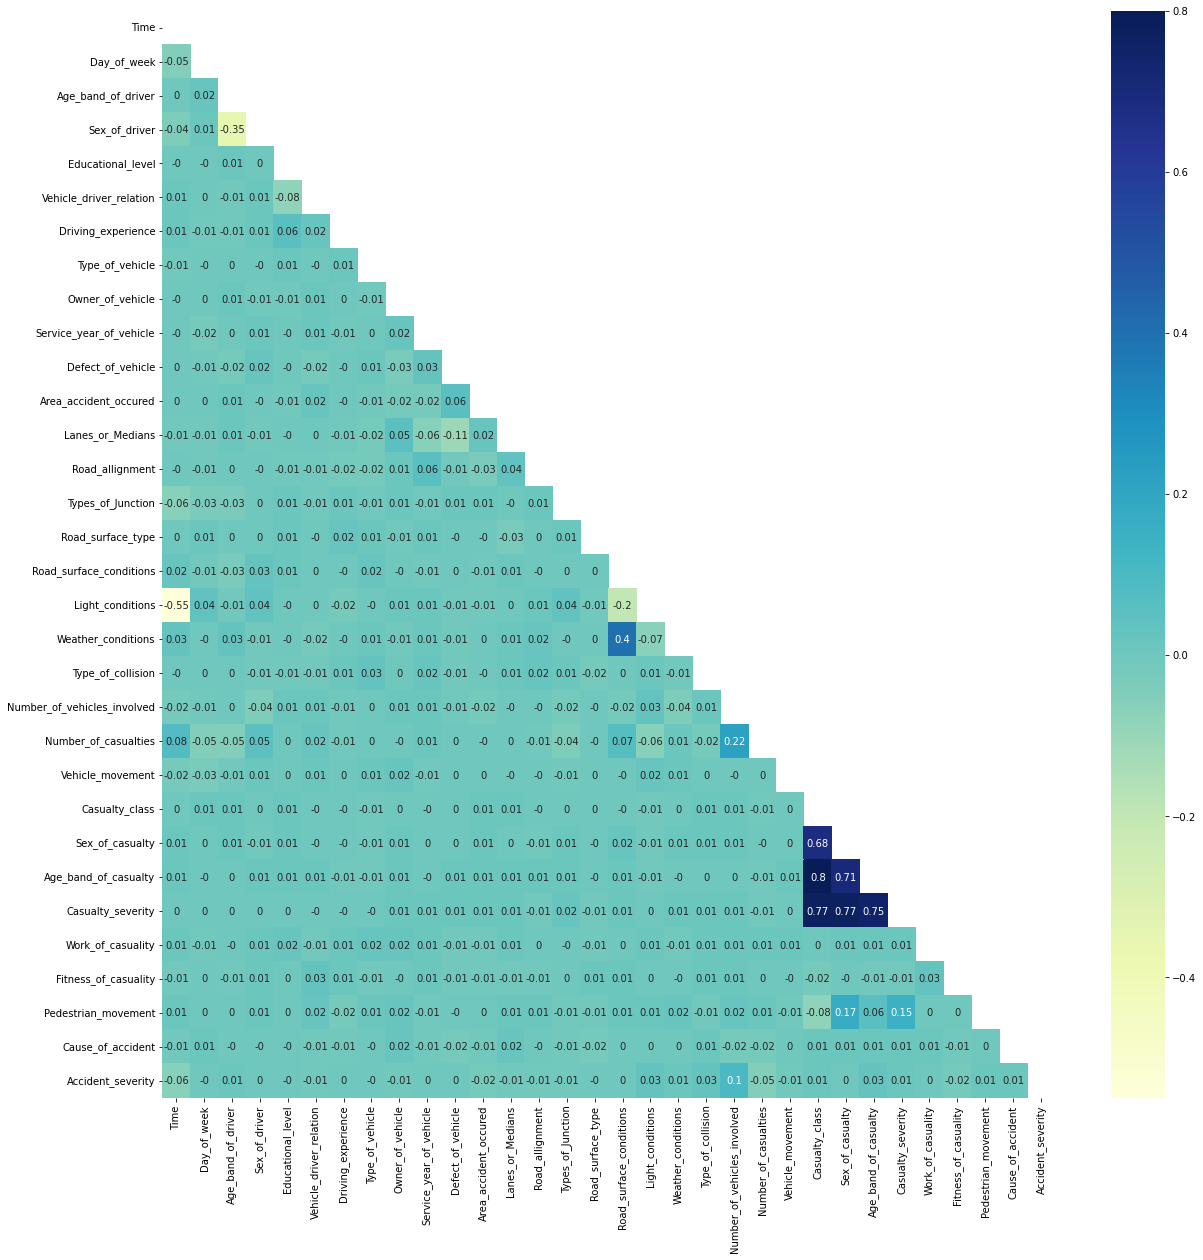

In [34]:
plt.figure(figsize = (20, 20))
mask = np.triu(np.ones_like(RTA_Data.corr(), dtype=bool))
sns.heatmap(RTA_Data.corr().round(2),annot=True, cmap="YlGnBu",mask=mask)

In [35]:
RTA_Data.to_csv("RTA_Cleaned_LableEnoded.csv",index=False)

## Oversampling the imbalance data using SMOTE (synthetic Minority oversampling technique)

### Seperate the independent and target features

In [36]:
from sklearn.model_selection import train_test_split

X = RTA_Data.drop(['Accident_severity'],axis=1)
y = RTA_Data['Accident_severity']

In [37]:
target_class = ['Fatal Injury','Serious Injury', 'Slight Injury']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,stratify=y,random_state=25)

### Target distridution before upsampling

Class=2, n=8331 (67.644%)
Class=1, n=1394 (11.319%)
Class=0, n=127 (1.031%)


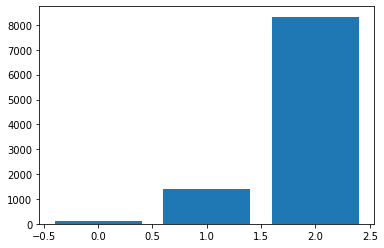

In [39]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=2, n=8331 (33.333%)
Class=1, n=8331 (33.333%)
Class=0, n=8331 (33.333%)


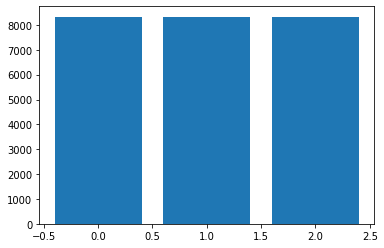

In [40]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## Model Fitting

In [43]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


In [44]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('Xtree', ExtraTreesClassifier()))
models.append(('ada', AdaBoostClassifier()))
models.append(('gradboost', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))


In [45]:
num_folds = 5
seed = 7
scoring = 'accuracy'


In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0)
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

0.7297077922077922

In [118]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.610891 (0.002135)
KNN: 0.818269 (0.006147)
NB: 0.451206 (0.007537)
SVM: 0.814548 (0.004412)
DT: 0.844796 (0.004084)
RF: 0.927980 (0.004351)
Xtree: 0.944024 (0.002088)
ada: 0.689873 (0.004948)
gradboost: 0.788140 (0.007260)
XGB: 0.760493 (0.005771)


In [79]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)
cls.score(X_test, y_test)

0.7297077922077922

In [80]:
cls.score(X_train, y_train)

0.9977993838274717

In [65]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
Accuracy  =  accuracy_score(y_test, y_pred)
Precision =  precision_score(y_test, y_pred, average= 'weighted')
Recall    =  recall_score(y_test, y_pred, average= 'weighted')
F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

In [70]:
Accuracy , Precision, Recall, F1_score

(0.8218344155844156,
 0.7665187788947543,
 0.8218344155844156,
 0.7873074106335177)

In [75]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [76]:
extree.max_depth

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
    "n_estimators" : [200,400],
    "max_depth" : [5,10,15],
    "criterion" : ['gini','entropy'],
    "min_samples_split" : [5,10],
    "min_samples_leaf" : [5,10] 
    
}

Xtree_Gs = GridSearchCV(extree, param_grid = param, cv = 5, verbose = 3)
Xtree_Gs.fit(X_train,y_train)

In [50]:
Xtree_Gs.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 400}

In [58]:
extree = ExtraTreesClassifier(**Xtree_Gs.best_params_)
extree.fit(X_train,y_train)
y_hat = extree.predict(X_test)

In [59]:
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

In [60]:
Accuracy  =  accuracy_score(y_test, y_hat)
Precision =  precision_score(y_test, y_pred, average= 'weighted')
Recall    =  recall_score(y_test, y_pred, average= 'weighted')
F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

In [63]:
Accuracy , Precision, Recall, F1_score

(0.7114448051948052, 0.7679971346203289, 0.8206168831168831, 0.785890258835748)

In [54]:
param = {
    "n_estimators" : [600,800],
    "max_depth" : [5,10],
    
}

Xtree_Gs = GridSearchCV(extree, param_grid = param, cv = 5, verbose = 3)
Xtree_Gs.fit(X_train,y_train)
Xtree_Gs.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....max_depth=5, n_estimators=600;, score=0.598 total time=   5.6s
[CV 2/5] END .....max_depth=5, n_estimators=600;, score=0.718 total time=   4.6s
[CV 3/5] END .....max_depth=5, n_estimators=600;, score=0.694 total time=   4.4s
[CV 4/5] END .....max_depth=5, n_estimators=600;, score=0.689 total time=   4.5s
[CV 5/5] END .....max_depth=5, n_estimators=600;, score=0.698 total time=   4.6s
[CV 1/5] END .....max_depth=5, n_estimators=800;, score=0.594 total time=   6.5s
[CV 2/5] END .....max_depth=5, n_estimators=800;, score=0.714 total time=   6.4s
[CV 3/5] END .....max_depth=5, n_estimators=800;, score=0.698 total time=   6.0s
[CV 4/5] END .....max_depth=5, n_estimators=800;, score=0.696 total time=   6.0s
[CV 5/5] END .....max_depth=5, n_estimators=800;, score=0.702 total time=   6.1s
[CV 1/5] END ....max_depth=10, n_estimators=600;, score=0.677 total time=   7.5s
[CV 2/5] END ....max_depth=10, n_estimators=600;,

{'max_depth': 10, 'n_estimators': 600}

In [86]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        31\n           1       0.28      0.12      0.17       349\n           2       0.86      0.95      0.90      2084\n\n    accuracy                           0.82      2464\n   macro avg       0.38      0.36      0.36      2464\nweighted avg       0.76      0.82      0.78      2464\n'